In [1]:
info = {
 "title": "Stickman",
 "author": "Alex Carney",
 "github_username": "alcarney",
 "stylo_version": "0.7.0",
 "dimensions": (1920, 1080)
}

In [2]:
from math import pi, sin, cos

from stylo.domain.transform import translate, rotate
from stylo.color import FillColor
from stylo.shape import Circle, Line
from stylo.image import LayeredImage


%matplotlib inline

In [3]:
black = FillColor("000000")

class Stickman:
    
    def __init__(self):
        self.head_x = 0
        self.head_y = 1
        self.head_size = .3
        
        self.pt = 0.02
        
        self.body_angle = pi/2 
        self.body_length = 1
        self.leg_length = 1
        
        self.arm_length = 1
        self.left_arm_angle = self.body_angle - pi/8
        self.right_arm_angle = self.body_angle + pi/8
        
        self.left_leg_angle = self.body_angle + pi/8
        self.right_leg_angle = self.body_angle - pi/8
        
        self._calculate()
        
    def _calculate(self):
        
        self.body_end = self.head_size + self.body_length
        self.arm_start = self.head_size + 0*self.body_length
        
        self.neck = {
            'x': self.head_x + self.head_size*cos(-self.body_angle),
            'y': self.head_y + self.head_size*sin(-self.body_angle)
        }
        
        self.body = {
            'x': self.head_x + self.body_end*cos(-self.body_angle),
            'y': self.head_y + self.body_end*sin(-self.body_angle)
        }
        
        self.arm = {
            'x': self.head_x + self.arm_start * cos(-self.body_angle),
            'y': self.head_y + self.arm_start * sin(-self.body_angle)
        }
        
        self.leg_start = self.body_end
        self.leg_end = self.body_end + self.leg_length
        
        
    def _construct_head(self, image):
        
        head = Circle(r=self.head_size, pt=self.pt*0.9) \
             >> translate(self.head_x, self.head_y)
        
        image.add_layer(head, black)
        
    def _construct_body(self, image):
        
        body = Line((0, 0), (self.body_length,0), pt=self.pt*1.03) \
             >> rotate(self.body_angle) \
             >> translate(self.neck['x'], self.neck['y'])
        
        
        image.add_layer(body, black)
        
    def _construct_legs(self, image):
        
        left_leg = Line((0, 0), (self.leg_length, 0), pt=self.pt) \
                 >> rotate(self.left_leg_angle) \
                 >> translate(self.body['x'], self.body['y'])
        
        right_leg = Line((0, 0), (self.leg_length, 0), pt=self.pt) \
                  >> rotate(self.right_leg_angle) \
                  >> translate(self.body['x'], self.body['y'])
        
        
        image.add_layer(left_leg, black)
        image.add_layer(right_leg, black)
        
    def _construct_arms(self, image):
        
        left_arm = Line((0, 0), (self.arm_length, 0), pt=self.pt) \
                 >> rotate(self.left_arm_angle) \
                 >> translate(self.arm['x'], self.arm['y'])
        
        right_arm = Line((0,0), (self.arm_length, 0), pt=self.pt) \
                  >> rotate(self.right_arm_angle) \
                  >> translate(self.arm['x'], self.arm['y'])
            
        image.add_layer(left_arm, black)
        image.add_layer(right_arm, black)
    
    def construct(self, image):
        
        self._construct_head(image)
        self._construct_body(image)
        self._construct_legs(image)
        self._construct_arms(image)
        
        pass
    
stickman = Stickman()

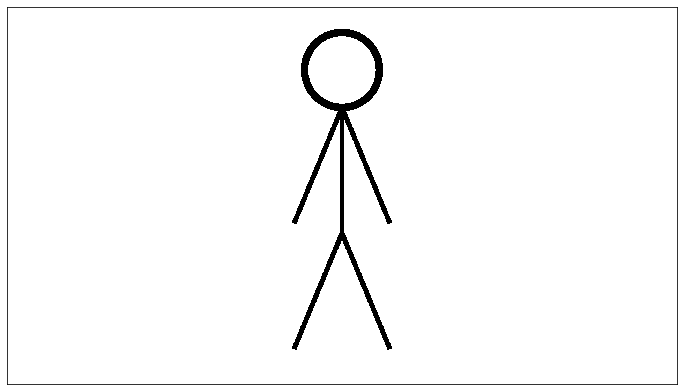

In [4]:
image = LayeredImage(scale=3)

stickman.construct(image)
